Step 1. Importing the dependencies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Step 2. Load the data 

In [2]:
df = pd.read_csv('Amazon Sales data.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df['Order_Date'] = pd.to_datetime(df['Order Date'])

In [5]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01


In [6]:
df['Ship_Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df.to_csv('amazon_sales_data.csv',index=False)

In [8]:
#df = df.drop('Order Date',axis=1)
df = df.drop('Ship Date',axis=1)

In [9]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Units Sold', 'Unit Price', 'Unit Cost',
       'Total Revenue', 'Total Cost', 'Total Profit', 'Order_Date',
       'Ship_Date'],
      dtype='object')

In [10]:
df['Total Revenue'].sum()

137348768.31

In [11]:
tr = df.groupby("Country")["Total Revenue"].sum().reset_index()

In [12]:
#print(tr)
tr_5 = tr.sort_values(by='Total Revenue',ascending=False).head(5)

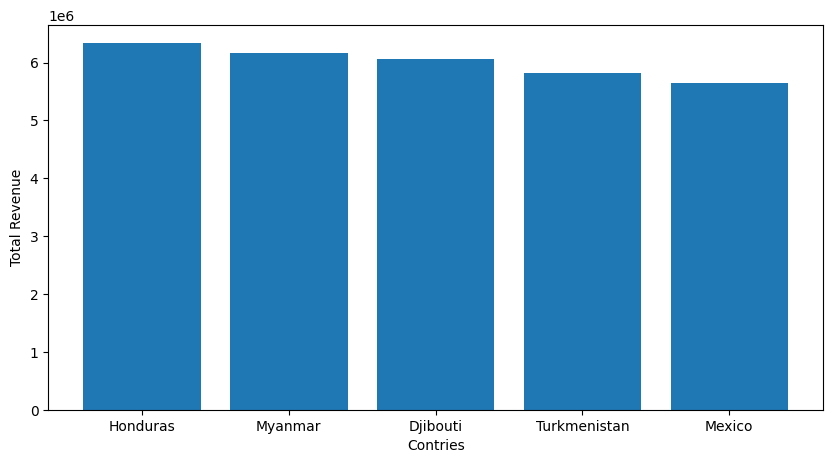

In [13]:
plt.figure(figsize=(10,5))
plt.bar(tr_5['Country'],tr_5['Total Revenue'])
plt.xlabel('Contries')
plt.ylabel('Total Revenue')
plt.show()

In [14]:
tr_5.dtypes

Country           object
Total Revenue    float64
dtype: object

In [15]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

In [16]:
#Rename the required colums 
#df = df.rename(columns={'Total_revenue':'Total_Revenue'})
df = df.rename(columns={'Total Revenue':'Total_Revenue','Total Cost':'Total_Cost'})

In [17]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total_Revenue,Total_Cost,Total Profit,Order_Date,Ship_Date,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,9925,255.28,159.42,2533654.0,1582243.50,951410.50,2010-05-28,2010-06-27,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,2804,205.70,117.11,576782.8,328376.44,248406.36,2012-08-22,2012-09-15,2012,8


In [ ]:
#Monthly Revenue 
monthly_revenue = df.groupby(['Year','Month']).agg(Total_Monthly_Revenue=('Total_Revenue','sum'),Total_Monthly_Cost=('Total_Cost','sum')).reset_index()
monthly_revenue.head(2)

,Year,Month,Total_Monthly_Revenue,Total_Monthly_Cost
0,2010,2,3410661.12,1986250.18
1,2010,5,2587973.26,1622531.74


In [19]:
monthly_plot = monthly_revenue.groupby('Month')['Total_Monthly_Revenue'].sum()
monthly_plot

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total_Monthly_Revenue, dtype: float64

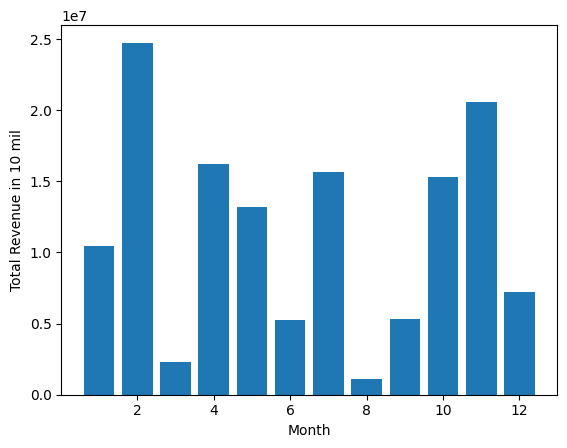

In [20]:
plt.bar(monthly_plot.index,monthly_plot.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue in 10 mil')
plt.show()

Text(0, 0.5, 'Revenue')

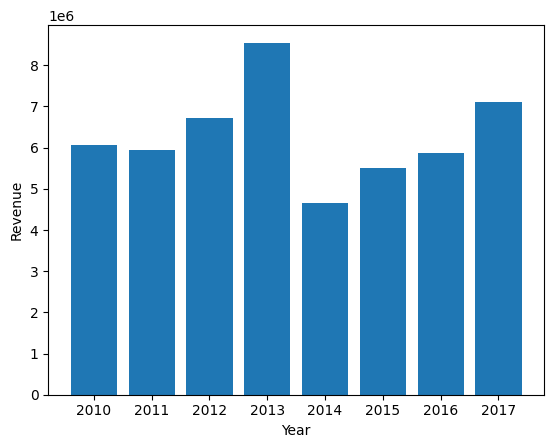

In [21]:
plt.bar(monthly_revenue['Year'],monthly_revenue['Total_Monthly_Revenue'])
plt.xlabel('Year')
plt.ylabel('Revenue')

In [22]:
monthly_revenue.head(2)

,Year,Month,Total_Monthly_Revenue,Total_Monthly_Cost
0,2010,2,3410661.12,1986250.18
1,2010,5,2587973.26,1622531.74


In [23]:
df.shape

(100, 17)

In [34]:
#Yearly Revenue 
Yearly_plot = monthly_revenue.groupby('Year')['Total_Monthly_Revenue'].sum()
Yearly_plot.sort_values()


Year
2011    11129166.07
2016    12372867.22
2015    12427982.86
2017    13373419.63
2014    16630214.43
2010    19186024.92
2013    20330448.66
2012    31898644.52
Name: Total_Monthly_Revenue, dtype: float64

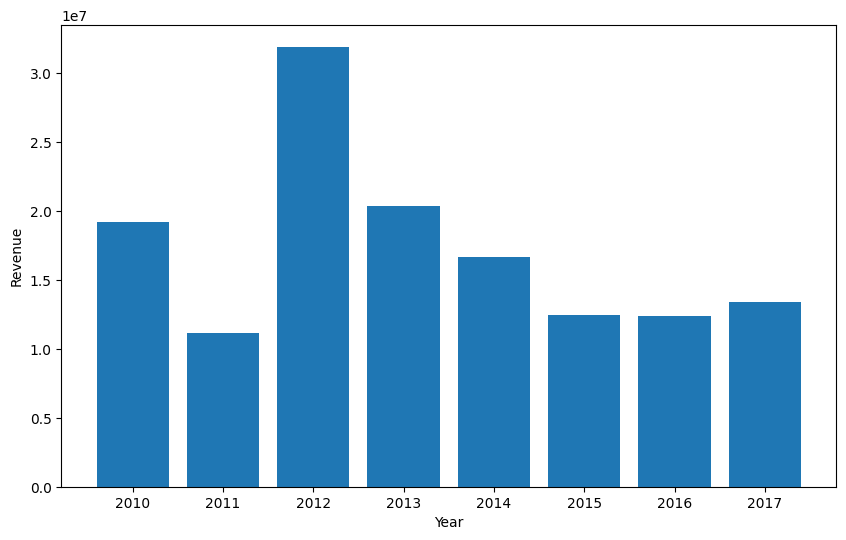

In [36]:
plt.figure (figsize=(10,6))
plt.bar(Yearly_plot.index,Yearly_plot.values)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()